In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load dataset

In [3]:
# Read the Excel file
df = pd.read_excel('/content/drive/My Drive/Paris_housing_index.xlsx')

In [4]:
# Show the first 5 rows of the dataset
df.head()

,id,room_type,room_sharing,room_private,person_capacity,host_status,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_rating,bedrooms,dist_city,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude,price
0,0,Entire home/apt,False,False,5,False,0,1,9,89,1,1.351201,0.212346,390.776774,19.001549,1030.738507,47.550371,2.35900,48.86800,536.396682
1,1,Private room,False,True,2,True,0,0,10,97,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282,290.101594
2,2,Entire home/apt,False,False,4,False,0,1,10,100,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375,445.754497
3,3,Private room,False,True,2,False,0,0,10,94,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475,211.343089
4,4,Entire home/apt,False,False,2,True,0,0,9,88,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384,266.334234


In [5]:
# Show details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6688 non-null   int64  
 1   room_type                  6688 non-null   object 
 2   room_sharing               6688 non-null   bool   
 3   room_private               6688 non-null   bool   
 4   person_capacity            6688 non-null   int64  
 5   host_status                6688 non-null   bool   
 6   multi_listing              6688 non-null   int64  
 7   business_listing           6688 non-null   int64  
 8   cleanliness_rating         6688 non-null   int64  
 9   guest_satisfaction_rating  6688 non-null   int64  
 10  bedrooms                   6688 non-null   int64  
 11  dist_city                  6688 non-null   float64
 12  dist_metro                 6688 non-null   float64
 13  attr_index                 6688 non-null   float

In [6]:
# Check for null (missing) values
df.isnull().sum()

id                           0
room_type                    0
room_sharing                 0
room_private                 0
person_capacity              0
host_status                  0
multi_listing                0
business_listing             0
cleanliness_rating           0
guest_satisfaction_rating    0
bedrooms                     0
dist_city                    0
dist_metro                   0
attr_index                   0
attr_index_norm              0
rest_index                   0
rest_index_norm              0
longitude                    0
latitude                     0
price                        0
dtype: int64

As we can see the dataset doesn't have missing values

In [7]:
df

,id,room_type,room_sharing,room_private,person_capacity,host_status,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_rating,bedrooms,dist_city,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude,price
0,0,Entire home/apt,False,False,5,False,0,1,9,89,1,1.351201,0.212346,390.776774,19.001549,1030.738507,47.550371,2.35900,48.86800,536.396682
1,1,Private room,False,True,2,True,0,0,10,97,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282,290.101594
2,2,Entire home/apt,False,False,4,False,0,1,10,100,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375,445.754497
3,3,Private room,False,True,2,False,0,0,10,94,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475,211.343089
4,4,Entire home/apt,False,False,2,True,0,0,9,88,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384,266.334234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683,6683,Entire home/apt,False,False,4,False,0,0,10,98,1,3.558773,0.154750,185.488125,9.029499,474.358260,27.873072,2.40050,48.85093,231.615248
6684,6684,Entire home/apt,False,False,2,False,1,0,9,89,1,4.205210,0.253034,172.658783,8.404971,406.585538,23.890778,2.40100,48.87700,223.692795
6685,6685,Entire home/apt,False,False,6,True,0,0,10,96,3,4.312136,0.304642,178.222781,8.675825,420.726229,24.721678,2.39334,48.88463,567.853481
6686,6686,Entire home/apt,False,False,2,True,0,0,9,93,1,2.891206,0.240686,235.168523,11.447924,602.451547,35.399774,2.38200,48.87400,200.391462


Columns 'dist_city' and 'dist_metro' are rounded to 3 decimal places

In [8]:
df['dist_city'] = df['dist_city'].round(3)
df['dist_metro'] = df['dist_metro'].round(3)

In [9]:
df.head()

,id,room_type,room_sharing,room_private,person_capacity,host_status,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_rating,bedrooms,dist_city,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude,price
0,0,Entire home/apt,False,False,5,False,0,1,9,89,1,1.351,0.212,390.776774,19.001549,1030.738507,47.550371,2.35900,48.86800,536.396682
1,1,Private room,False,True,2,True,0,0,10,97,1,0.700,0.194,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282,290.101594
2,2,Entire home/apt,False,False,4,False,0,1,10,100,1,0.969,0.294,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375,445.754497
3,3,Private room,False,True,2,False,0,0,10,94,1,3.302,0.235,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475,211.343089
4,4,Entire home/apt,False,False,2,True,0,0,9,88,1,1.402,0.055,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384,266.334234


Statistics

In [10]:
df.describe()

,id,person_capacity,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_rating,bedrooms,dist_city,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude,price
count,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000
mean,3343.500000,2.953648,0.219498,0.245813,9.263606,92.037530,0.972787,2.995832,0.227319,374.186582,18.204358,818.768769,42.589111,2.343033,48.864343,392.531403
std,1930.803632,1.215007,0.413937,0.430601,0.974036,8.818201,0.642571,1.463548,0.122775,159.494728,7.759372,283.504311,15.680438,0.033724,0.017405,330.949745
min,0.000000,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.072000,0.003000,116.297506,5.654976,258.674400,11.933258,2.247880,48.819940,92.739305
25%,1671.750000,2.000000,0.000000,0.000000,9.000000,89.000000,1.000000,1.831500,0.142000,262.319584,12.764097,594.578584,30.156870,2.322468,48.852000,240.935781
50%,3343.500000,2.000000,0.000000,0.000000,9.000000,94.000000,1.000000,2.997000,0.207000,337.941264,16.448810,771.165470,40.373716,2.346460,48.866080,317.597167
75%,5015.250000,4.000000,0.000000,0.000000,10.000000,98.000000,1.000000,4.051000,0.290250,456.269714,22.202119,1036.566155,53.072238,2.367052,48.877870,462.065430
max,6687.000000,6.000000,1.000000,1.000000,10.000000,100.000000,5.000000,7.704000,1.155000,2056.552199,100.000000,2167.677121,100.000000,2.438590,48.901060,16445.614690


1. Person capacity (is the Maximum number of occupancy):


*   The average maximum number of occupancy is 2 persons
*   Number of person capacity range from  2 to 6
*   Person capacity has a standard deviation of about 1.5, showing moderate variability.
*   The median number of person capacity is 2 which implies that half of the properties have a capacity of 2 or fewer persons.

2. Cleanliness Rating :


*   The average cleaning rate is 9.2
*   The cleaning rate range from 2 to 10.
*   The standard deviation is about 1 showing moderate variability.
*   Both the mean and median are around 9, showing a roughly symmetric distribution.

3. Overall satisfaction rating (guest_satisfaction_rating):


*   The average overall satisfaction rate is 92 % indicates high satisfaction among guests.
*   The rate percentage range from 20 to 100 %.
*   The lowest guest satisfaction rating is 20. This maybe is an outlier, as it is significantly lower than the other values and suggests there were some exceptionally dissatisfied guests.
*   The standard deviation is about 9 which is relatively small compared to the mean, showing moderate variability
*   The median (94) is higher than the mean (92) suggests a slight positive skew in the distribution, meaning more ratings are clustered towards the higher end

4. Bedrooms:


*   On average, properties have under 1 bedroom.
*   The standard deviation is about 0.65, indicating moderate variability around the mean.
*   The mean, median, 25th percentile, and 75th percentile all being around 1 bedroom indicate that most properties are studio appartments.
*   The maximum value of 5 bedrooms shows that there are some larger properties, but they are not common, as indicated by the standard deviation.

5. Distance from city center:


*   The average distance from the city is approximately 3 (kilometers i suppose the distance metric is km?).
*   The distance range from 0.07 km to 7.7 km
*   the standard deviation is 1.46 kilometers showing moderate variability.  
*   The minimum and maximum values (0.07 km and 7.7 km) show that while most properties are close to the city, there are a few that are either very close or relatively further away (possible outliers)

6. Distance from nearest metro:


* The average distance from the nearest metro is approximately 0.227 km  
* The distance range from 0 to 1.15 km indicating that some properties are located further away from metro stations, but still within a reasonable walking distance.
* The standard deviation of 0.123 indicates a relatively small variability around the mean.
*  The average and median distances being 0.227 kilometers and 0.21 kilometers, respectively, suggest that the properties are generally very close to metro stations, which is convenient for public transportation access.

7. Attraction index range 1 to 100 ("attr_index_norm"):


*   The average attraction index is about 18.2, suggesting that properties are located in areas with relatively low attraction indexes.
*   The standard deviation of 7.759372 indicates a moderate level of variability
*   Attraction index range from 5.65 to 100 showing that while most properties have low to moderate attraction indexes, there are some properties located in areas with very high attraction indexes, which are outliers in this context.
*   The mean and median values (18.2 and 16.45, respectively) suggest that the majority of properties are located in areas with relatively low attraction indexes.

8. Restaurant index range 1 to 100 ("rest_index_norm"):


*   The average restaurant index rate is approximately 42.59, suggesting that properties are in areas with moderate restaurant density or quality.
*   The standard deviation of 15.680438 indicates a moderate to high level of variability.
*   Restaurant index range from 11.93 to 100 showing that while most properties have moderate restaurant index rates, there are some properties in areas with very low and very high restaurant density or quality.
*   The close values of the mean and median indicate a relatively symmetrical distribution.

9. Price


*   The average price is 392.53 (euros)
*   The standard deviation of 330.95 indicates a high level of variability.
*   Prices range from 93 to 16446 indicating that there are extreme outliers on both ends, with some properties being very inexpensive and others being extremely expensive
*   The median (317.60) being lower than the mean (392.53) suggests a right-skewed distribution.





























In [11]:
import plotly.express as px

Check for ouliers

**Scatter plot**

In [12]:
fig1=px.scatter(df, x='bedrooms', y= 'price',size='person_capacity',color='bedrooms',hover_data=['cleanliness_rating','guest_satisfaction_rating','dist_city','dist_metro','rest_index_norm'])
fig1

**Observations from scatter plot**

1. As we can see there is significant variability in property prices.
2. The maximum price is extremely high, indicating the presence of luxury properties, specially for houses with 1 or 2 bedrooms.

Overall, the data indicates a market with mostly small properties but a wide range of prices, from very affordable to extremely high-end. The presence of a few high-priced properties significantly impacts the average price, creating a skewed distribution.

# **Bar plot for categorical variables**

In [13]:
df.head()

,id,room_type,room_sharing,room_private,person_capacity,host_status,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_rating,bedrooms,dist_city,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude,price
0,0,Entire home/apt,False,False,5,False,0,1,9,89,1,1.351,0.212,390.776774,19.001549,1030.738507,47.550371,2.35900,48.86800,536.396682
1,1,Private room,False,True,2,True,0,0,10,97,1,0.700,0.194,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282,290.101594
2,2,Entire home/apt,False,False,4,False,0,1,10,100,1,0.969,0.294,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375,445.754497
3,3,Private room,False,True,2,False,0,0,10,94,1,3.302,0.235,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475,211.343089
4,4,Entire home/apt,False,False,2,True,0,0,9,88,1,1.402,0.055,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384,266.334234


In [14]:
# create a new dataframe
df1=df.groupby(['room_type','person_capacity']).count().reset_index().sort_values(by='person_capacity',ascending=False)
df1

,room_type,person_capacity,id,room_sharing,room_private,host_status,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_rating,bedrooms,dist_city,dist_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude,price
4,Entire home/apt,6,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351
9,Private room,6,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
13,Shared room,6,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
3,Entire home/apt,5,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208
8,Private room,5,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
2,Entire home/apt,4,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598
7,Private room,4,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
12,Shared room,4,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
1,Entire home/apt,3,554,554,554,554,554,554,554,554,554,554,554,554,554,554,554,554,554,554
6,Private room,3,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90


In [15]:
#rename column id to counts as idicating the counts of the houses
df1['counts']=df1['id']

Scatter plot

In [16]:
fig2=px.bar(df1,x='counts',y='room_type',color='person_capacity')
fig2

As we can see:

*   Most properties consist of entire homes or apartments with a capacity of 2 people.
*   Next, there are entire homes or apartments that can accommodate 4 people

*   Following that are private rooms with a capacity of 2.

*   The fewest properties are shared rooms with a capacity of 6.



# Correlation for numerical values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6688 non-null   int64  
 1   room_type                  6688 non-null   object 
 2   room_sharing               6688 non-null   bool   
 3   room_private               6688 non-null   bool   
 4   person_capacity            6688 non-null   int64  
 5   host_status                6688 non-null   bool   
 6   multi_listing              6688 non-null   int64  
 7   business_listing           6688 non-null   int64  
 8   cleanliness_rating         6688 non-null   int64  
 9   guest_satisfaction_rating  6688 non-null   int64  
 10  bedrooms                   6688 non-null   int64  
 11  dist_city                  6688 non-null   float64
 12  dist_metro                 6688 non-null   float64
 13  attr_index                 6688 non-null   float

In [18]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap')

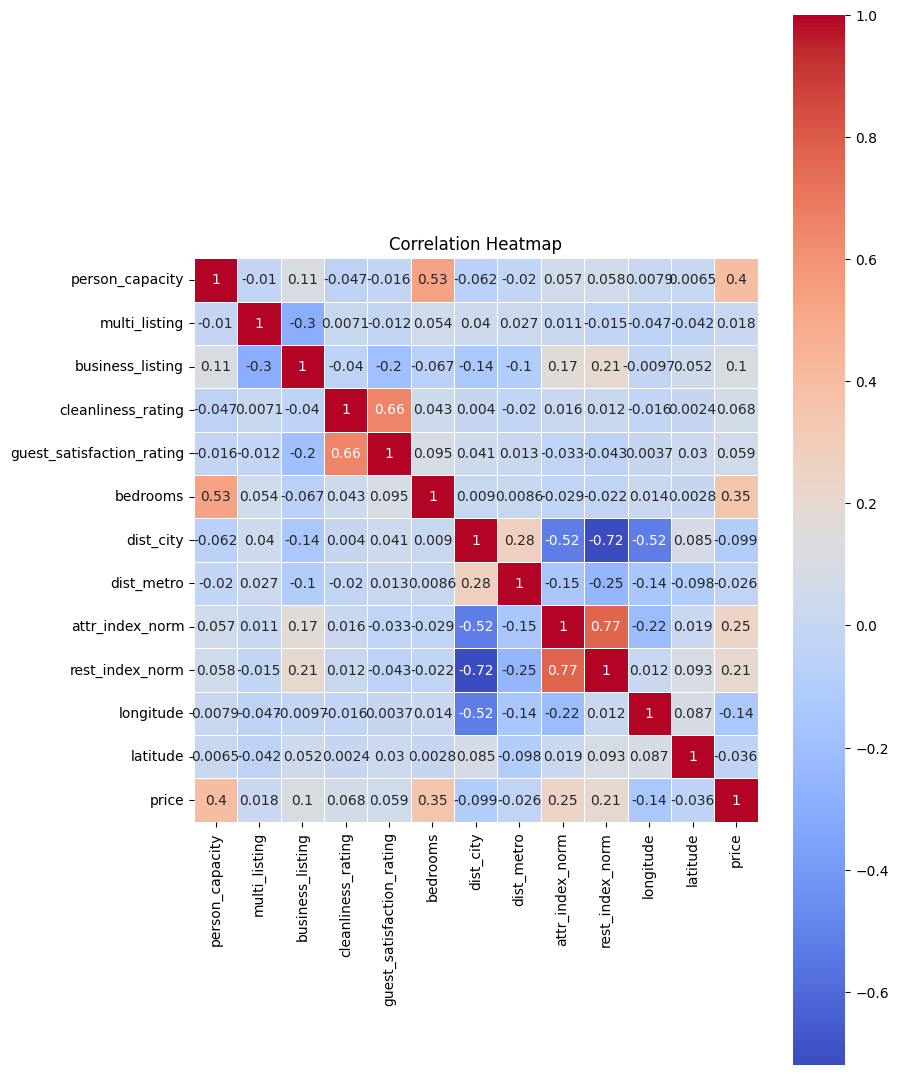

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 30))

# Heatmap to show correlation between numeric variables
plt.subplot(2, 2, 1)
corr_matrix = df[['person_capacity', 'multi_listing', 'business_listing', 'cleanliness_rating', 'guest_satisfaction_rating','bedrooms',
                  'dist_city','dist_metro','attr_index_norm','rest_index_norm','longitude','latitude','price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap')



*   Price has strong correlation with person capacity
*   Guest satisfaction rating has strong correlation with clean rating
*   Price has weak correlation with distance from city center



